In [4]:
from torchvision import transforms
from pathlib import Path
import torch

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

Using device: cuda


In [6]:
data_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

In [ ]:
HIDDEN_UNITS = 64
BATCH_SIZE = 32

In [8]:
from utils import dataloader
base_dir = Path("data/")
train_path = base_dir / 'dataset_1' / 'train'
test_path = base_dir / 'dataset_1'/ 'test'

train_dataloader, test_dataloader, class_names = dataloader.create_dataloaders(
    test_dir=test_path,
    train_dir=train_path,
    transform=data_transform,
    batch_size=BATCH_SIZE,
)

In [9]:
from models import model_builder
model = model_builder.TinyVGG(
    input_shape=3,
    hidden_units=HIDDEN_UNITS,
    output_shape=len(class_names)
).to(device)

In [12]:
from utils.save_load import load_model 
loaded_model = load_model(model=model,
                            target_dir="models",
                            model_name="tiny_vgg_model_1.pth")

[INFO] Loading model from: models\tiny_vgg_model_1.pth


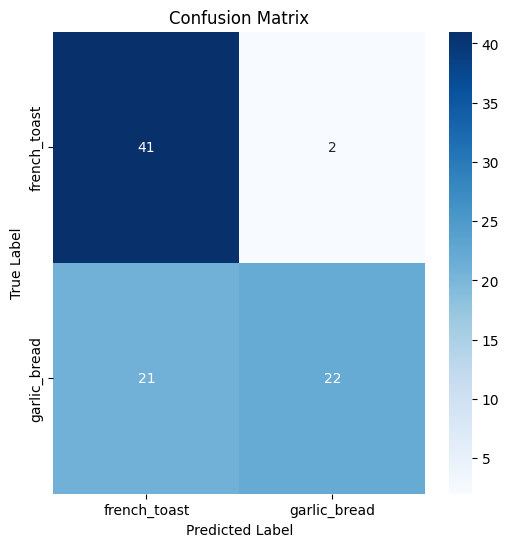

In [13]:
from utils.plots import evaluate_model
evaluate_model(model, test_dataloader, class_names, device)